In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.compose import make_column_transformer
from sklearn.metrics import roc_auc_score,accuracy_score,roc_curve,f1_score,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
import warnings
warnings.filterwarnings('ignore')


df = pd.read_csv("C:/ML/python/data/income.csv",delimiter=',')
df.head(10)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,Self-emp-not-inc,223881,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,70,United-States,>50K
1,30,Private,149118,HS-grad,9,Divorced,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
2,46,Private,109209,Some-college,10,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,>50K
3,32,Private,229566,Assoc-voc,11,Married-civ-spouse,Other-service,Husband,White,Male,0,0,60,United-States,>50K
4,54,?,148657,Preschool,1,Married-civ-spouse,?,Wife,White,Female,0,0,40,Mexico,<=50K
5,63,Private,111963,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,16,United-States,<=50K
6,25,Private,207875,7th-8th,4,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,Mexico,<=50K
7,71,Local-gov,229110,HS-grad,9,Widowed,Exec-managerial,Other-relative,White,Female,0,0,33,United-States,<=50K
8,37,Private,66686,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
9,44,Private,227399,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,40,United-States,<=50K


In [2]:
df.isnull().sum()


age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

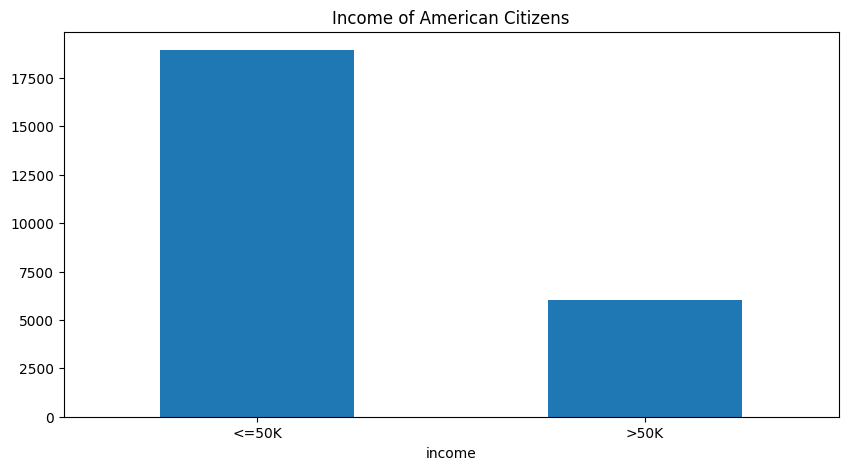

In [5]:
df.drop_duplicates(inplace=True)

df.columns = df.columns.str.replace(".","_")

plt.figure(figsize=(10,5))
df['income'].value_counts().plot(kind='bar',rot=0)
plt.title("Income of American Citizens")
plt.show()


In [6]:
df['income'] = [1 if X == '>50K' else 0 for X in df['income']]

print(df.dtypes)
print(df.nunique())
print(df.describe)
print(df.duplicated)
print(df.isnull().sum())

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income             int64
dtype: object
age                  73
workclass             9
fnlwgt            17876
education            16
education_num        16
marital_status        7
occupation           15
relationship          6
race                  5
sex                   2
capital_gain        117
capital_loss         90
hours_per_week       93
native_country       41
income                2
dtype: int64
<bound method NDFrame.describe of        age         workclass  fnlwgt     education  education_num  \
0       40  Self-emp-not-inc  223881   Prof-school             15   
1       30           Private  149118       HS-grad              9 

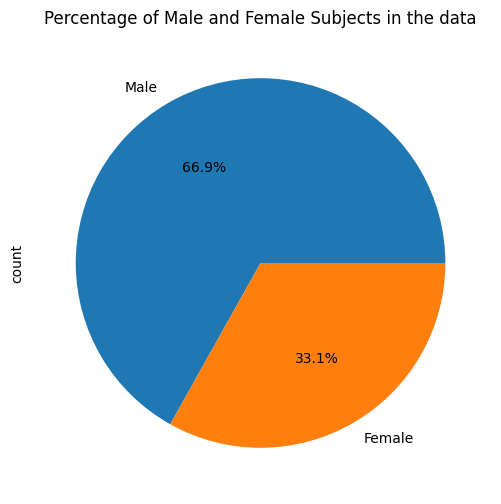

In [9]:
plt.figure(figsize=(10,6))
df['sex'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title("Percentage of Male and Female Subjects in the data")
plt.show()


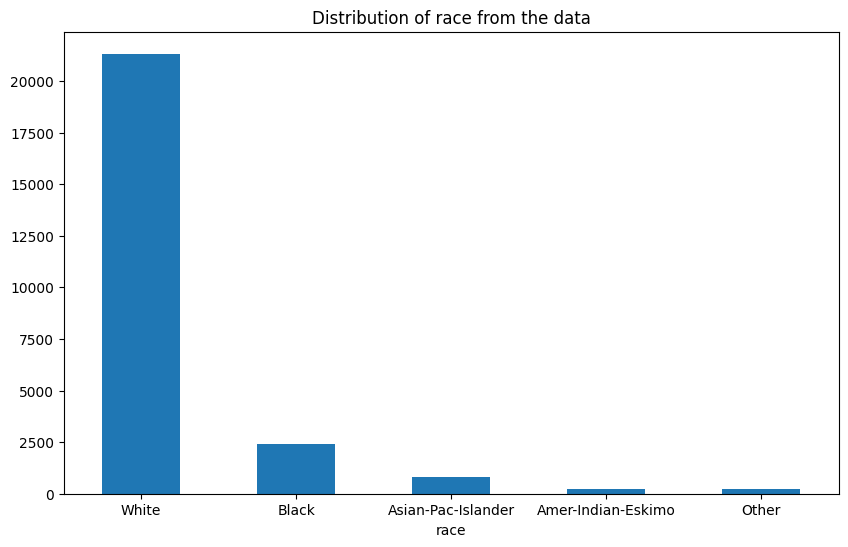

In [11]:
plt.figure(figsize=(10,6))
df['race'].value_counts().plot(kind='bar',rot=0)
plt.title("Distribution of race from the data")
plt.show()


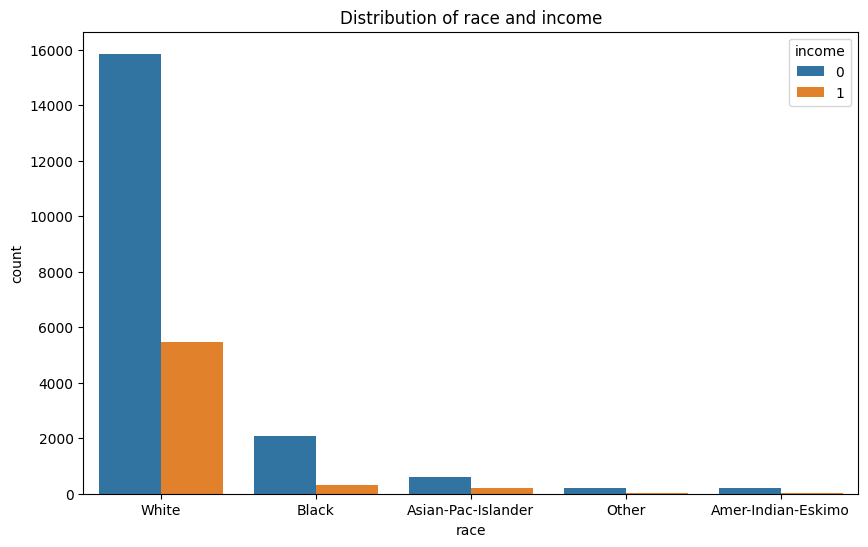

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='race',hue='income',data=df)
plt.title("Distribution of race and income")
plt.show()


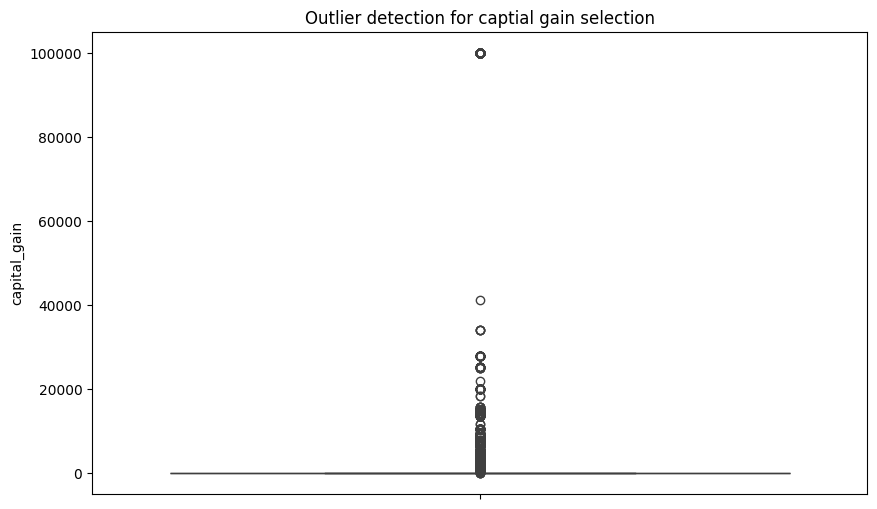

In [14]:
plt.figure(figsize=(10,6))
sns.boxplot(df['capital_gain'])
plt.title("Outlier detection for captial gain selection")
plt.show()


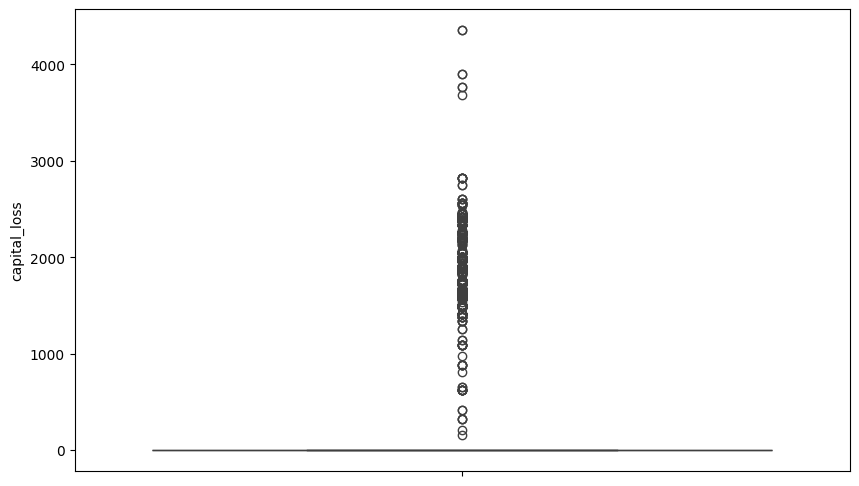

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(df['capital_loss'])
plt.show()

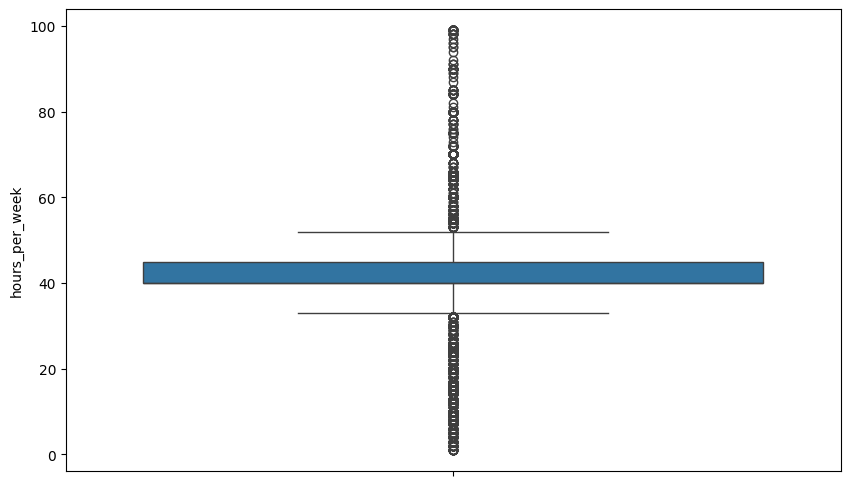

In [16]:
plt.figure(figsize=(10,6))
sns.boxplot(df['hours_per_week'])
plt.show()


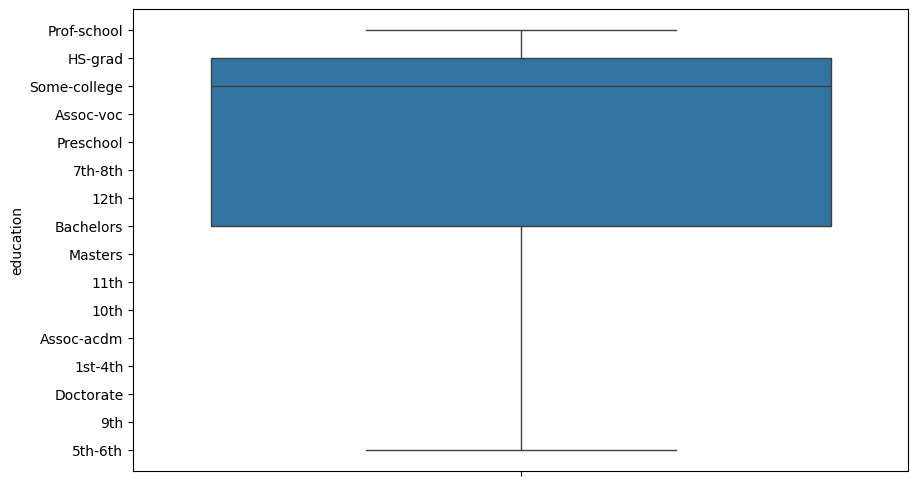

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(df['education'])
plt.show()

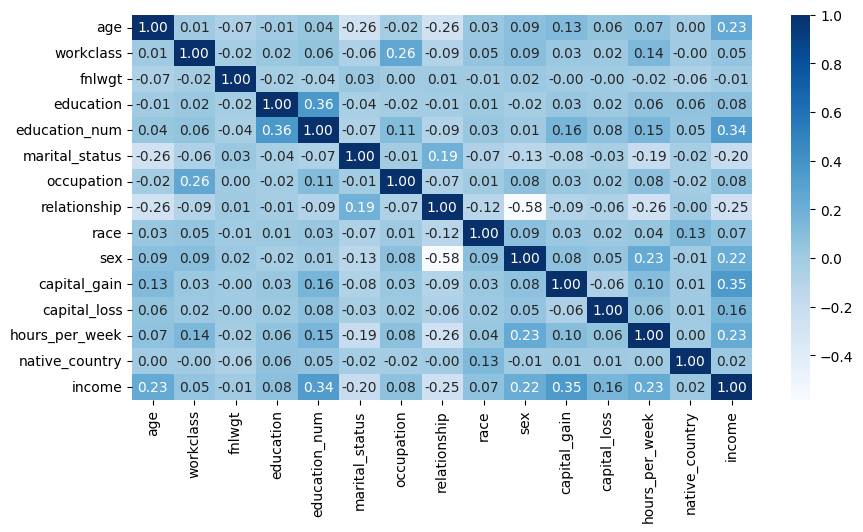

In [18]:
df1 = df.copy()
le = LabelEncoder()

for i in df1:
    df1[i] = le.fit_transform(df1[i])


plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True,fmt=".2f",cmap="Blues")
plt.show()


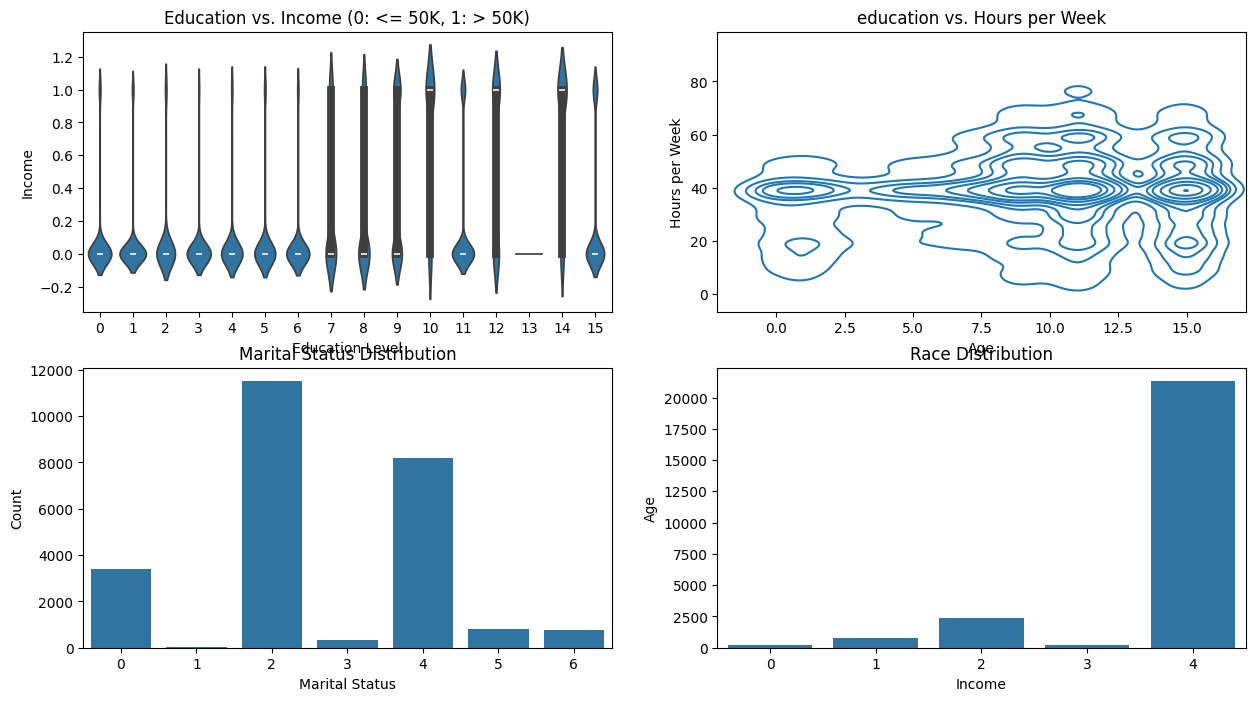

In [19]:
def subplots(dataframe):
    fig,axs = plt.subplots(2,2,figsize=(15, 8))

    sns.violinplot(x='education',y='income',data=dataframe, ax=axs[0,0])
    axs[0,0].set_title('Education vs. Income (0: <= 50K, 1: > 50K)')
    axs[0,0].set_xlabel('Education Level')
    axs[0,0].set_ylabel('Income')

    sns.kdeplot(x='education', y='hours_per_week',data=dataframe,ax=axs[0,1])
    axs[0,1].set_title('education vs. Hours per Week')
    axs[0,1].set_xlabel('Age')
    axs[0,1].set_ylabel('Hours per Week')

    sns.countplot(x='marital_status', data=dataframe, ax=axs[1,0])
    axs[1,0].set_title('Marital Status Distribution')
    axs[1,0].set_xlabel('Marital Status')
    axs[1,0].set_ylabel('Count')

    sns.countplot(x='race', data=dataframe, ax=axs[1, 1])
    axs[1, 1].set_title('Race Distribution')
    axs[1,1].set_xlabel('Income')
    axs[1,1].set_ylabel('Age')

    plt.show()

subplots(df1)

In [20]:
X = df.drop('income',axis=1)
y = df['income']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## making column transformer
ohe = OneHotEncoder(sparse_output=False)
sc = StandardScaler()


ct = make_column_transformer(
    (ohe,X.select_dtypes(include='object').columns),
    (sc,X.select_dtypes(include=['int64','float64']).columns),remainder='passthrough')


ct.fit_transform(X)

## metrics for models

def evaluate_model(model,X_train,X_test,y_train,y_test):
    pipe = make_pipeline(ct,model).fit(X_train,y_train)
    pred = pipe.predict(X_test)
    pred_prob = pipe.predict_proba(X_test)[:,1]
    acc = accuracy_score(y_test, pred)
    roc = roc_auc_score(y_test,pred_prob)
    f1 = f1_score(y_test,pred)
    print(f'{model.__class__.__name__}, --Accuracy Score-- {acc*100:.2f}%; --ROC-- {roc*100:.2f}%; --F1-- {f1*100:.2f}%')
    return pred,pred_prob

lr_pred,lr_pred_prob = evaluate_model(LogisticRegression(), X_train, X_test, y_train, y_test)
rfc_pred,rfc_pred_prob = evaluate_model(RandomForestClassifier(), X_train, X_test, y_train, y_test)
gbc_pred,gbc_pred_prob = evaluate_model(GradientBoostingClassifier(), X_train, X_test, y_train, y_test)
trees_pred,trees_pred_prob = evaluate_model(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)
BC_pred,BC_pred_prob = evaluate_model(BaggingClassifier(), X_train, X_test, y_train, y_test)
knn_pred,knn_pred_prob = evaluate_model(KNeighborsClassifier(n_neighbors=6), X_train, X_test, y_train, y_test)


LogisticRegression, --Accuracy Score-- 85.77%; --ROC-- 90.72%; --F1-- 66.19%
RandomForestClassifier, --Accuracy Score-- 85.69%; --ROC-- 90.44%; --F1-- 66.26%
GradientBoostingClassifier, --Accuracy Score-- 86.79%; --ROC-- 92.08%; --F1-- 67.65%
DecisionTreeClassifier, --Accuracy Score-- 81.69%; --ROC-- 74.61%; --F1-- 60.85%
BaggingClassifier, --Accuracy Score-- 85.29%; --ROC-- 87.81%; --F1-- 64.78%
KNeighborsClassifier, --Accuracy Score-- 84.05%; --ROC-- 86.64%; --F1-- 60.29%


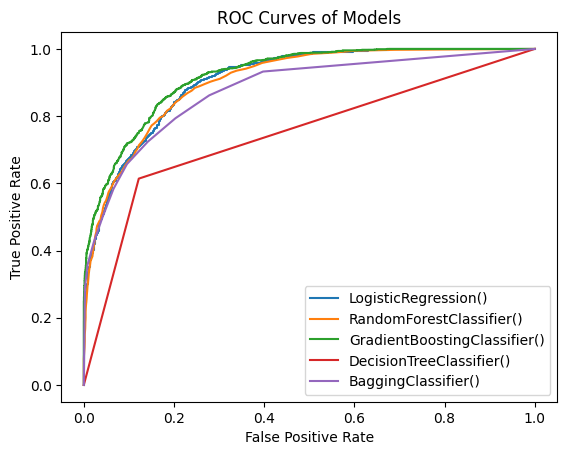

In [21]:
def ROC(y_test, y_pred_prob, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'{model_name}')
    plt.title("ROC Curves of Models")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")


ROC(y_test,lr_pred_prob,LogisticRegression())
ROC(y_test,rfc_pred_prob,RandomForestClassifier())
ROC(y_test,gbc_pred_prob,GradientBoostingClassifier())
ROC(y_test,trees_pred_prob,DecisionTreeClassifier())
ROC(y_test,BC_pred_prob,BaggingClassifier())
plt.legend()
plt.show()


In [22]:
def cv_scores(X,y,model):
  pipe = make_pipeline(ct,model)
  cv_scores = cross_val_score(pipe,X,y,cv=10,scoring='roc_auc').max()
  print(f'{model.__class__.__name__}, --Resutlst from 10-fold Cross Validation-- {cv_scores*100:.2f}%')
  return cv_scores


lr_scores = cv_scores(X,y,LogisticRegression())
rfc_scores = cv_scores(X,y,RandomForestClassifier())
gbc_scores = cv_scores(X,y,GradientBoostingClassifier())
trees_scores = cv_scores(X,y,DecisionTreeClassifier())

LogisticRegression, --Resutlst from 10-fold Cross Validation-- 91.62%
RandomForestClassifier, --Resutlst from 10-fold Cross Validation-- 91.25%
GradientBoostingClassifier, --Resutlst from 10-fold Cross Validation-- 93.26%
DecisionTreeClassifier, --Resutlst from 10-fold Cross Validation-- 77.40%


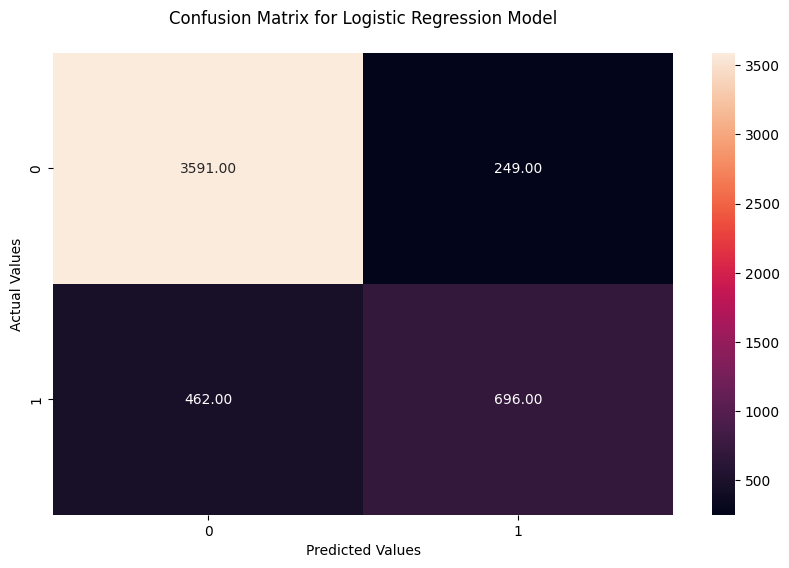

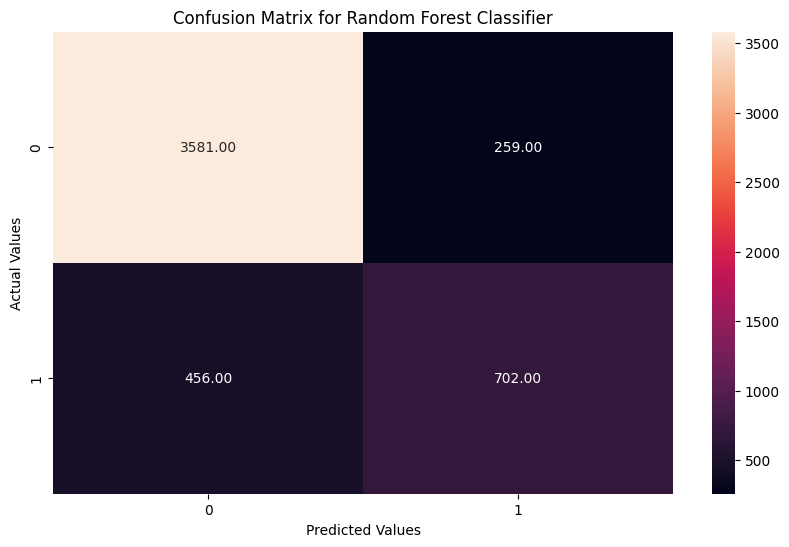

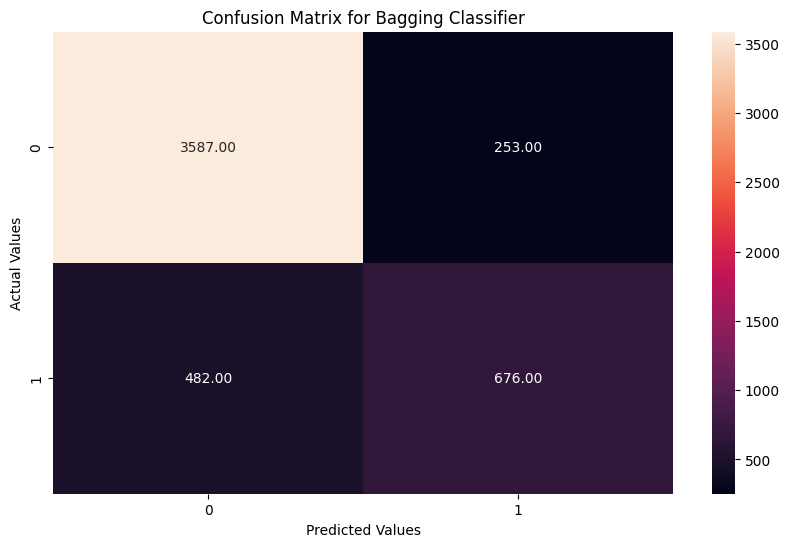

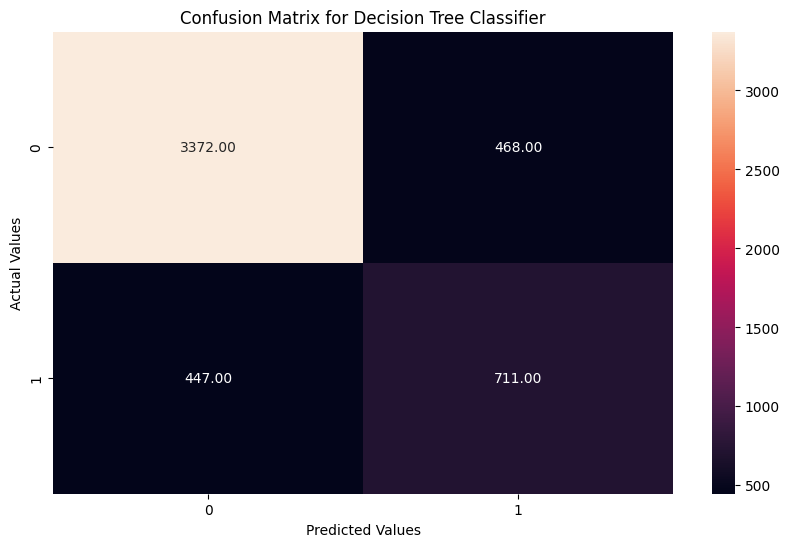

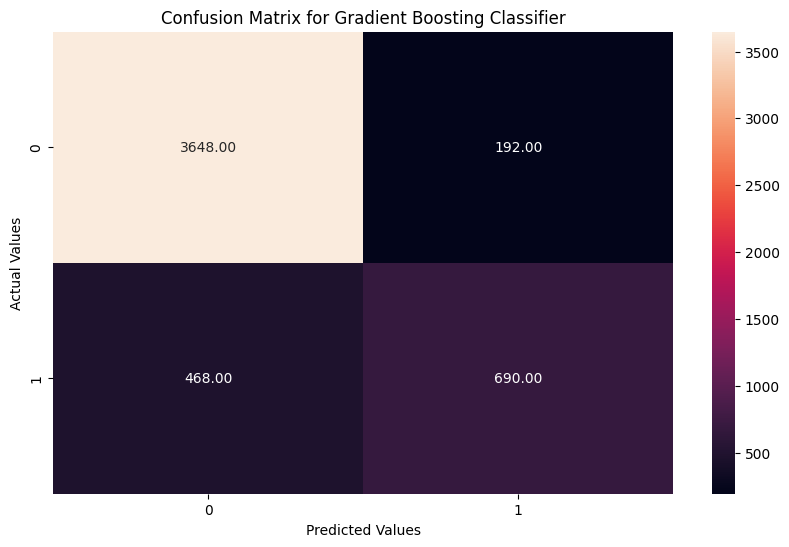

In [23]:
def plot_confusion_matrix(y_test,y_pred,model):
    con_map = confusion_matrix(y_test,y_pred)
    heat_map = sns.heatmap(con_map,fmt='.2f',annot=True)
    plt.xlabel("Predicted Values")
    plt.ylabel("Actual Values")
    plt.title(f"Confusion Matrix for {model.__class__.__name__}")
    return heat_map


plt.figure(figsize=(10,6))
plot_confusion_matrix(y_test,lr_pred,LogisticRegression())
plt.title("Confusion Matrix for Logistic Regression Model\n")
plt.show()

plt.figure(figsize=(10,6))
plot_confusion_matrix(y_test,rfc_pred,RandomForestClassifier())
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()


plt.figure(figsize=(10,6))
plot_confusion_matrix(y_test,BC_pred,BaggingClassifier())
plt.title("Confusion Matrix for Bagging Classifier")
plt.show()


plt.figure(figsize=(10,6))
plot_confusion_matrix(y_test,trees_pred,DecisionTreeClassifier())
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.show()


plt.figure(figsize=(10,6))
plot_confusion_matrix(y_test,gbc_pred,GradientBoostingClassifier())
plt.title("Confusion Matrix for Gradient Boosting Classifier")
plt.show()


In [30]:
lr_random_param_grid = {
    'logisticregression__C': np.logspace(-4,4,9),
    'logisticregression__penalty': ['l1','l2']
}

lr_random_search = RandomizedSearchCV(
    make_pipeline(ct,LogisticRegression()),
    lr_random_param_grid,
    n_iter=20,
    scoring='roc_auc',
    cv=5,
    random_state=42
).fit(X_train, y_train)


# Best Logistic Regression model
best_lr_estimator = lr_random_search.best_estimator_
lr_random_pred = best_lr_estimator.predict(X_test)
lr_random_pred_prob = best_lr_estimator.predict_proba(X_test)[:,1]
print(f'Logistic Regression - Best Parameters: {lr_random_search.best_params_}')
print(f'Logistic Regression - Best ROC-AUC Score: {lr_random_search.best_score_ * 100:.2f}%')

Logistic Regression - Best Parameters: {'logisticregression__penalty': 'l2', 'logisticregression__C': np.float64(1.0)}
Logistic Regression - Best ROC-AUC Score: 90.68%


In [31]:
rfc_param_grid = {
    'randomforestclassifier__n_estimators': [50,100,200],
    'randomforestclassifier__max_depth': [None,10,20],
    'randomforestclassifier__min_samples_split': [2,5,10],
    'randomforestclassifier__min_samples_leaf': [1,2,4]
}

rfc_random_search = RandomizedSearchCV(
    make_pipeline(ct,RandomForestClassifier()),
    rfc_param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=42
).fit(X_train, y_train)

best_rfc_estimator = rfc_random_search.best_estimator_
rfc_random_pred = best_rfc_estimator.predict(X_test)
rfc_random_pred_prob = best_rfc_estimator.predict_proba(X_test)[:, 1]
print(f'Random Forest - Best Parameters: {rfc_random_search.best_params_}')
print(f'Random Forest - Best ROC-AUC Score: {rfc_random_search.best_score_ * 100:.2f}')

Random Forest - Best Parameters: {'randomforestclassifier__n_estimators': 100, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__min_samples_leaf': 2, 'randomforestclassifier__max_depth': None}
Random Forest - Best ROC-AUC Score: 91.59


In [32]:
gbc_random_param_grid = {
    'gradientboostingclassifier__n_estimators': [50,100,200],
    'gradientboostingclassifier__learning_rate': [0.01,0.1,0.2],
    'gradientboostingclassifier__max_depth': [3,4,5],
    'gradientboostingclassifier__min_samples_split': [2,5,10],
}
gbc_random_search = RandomizedSearchCV(
    make_pipeline(ct,GradientBoostingClassifier()),
    gbc_random_param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=42
).fit(X_train,y_train)


In [33]:
knn_param_grid = {
    'kneighborsclassifier__n_neighbors': [3,5,7,10],
    'kneighborsclassifier__weights': ['uniform','distance'],
    'kneighborsclassifier__p': [1,2]
}

knn_grid_search = RandomizedSearchCV(
    make_pipeline(ct,KNeighborsClassifier()),
    knn_param_grid,
    scoring='roc_auc',
    cv=5).fit(X_train, y_train)


best_knn_estimator = knn_grid_search.best_estimator_
knn_grid_pred = best_knn_estimator.predict(X_test)
knn_grid_pred_prob = best_knn_estimator.predict_proba(X_test)[:,1]
print(f'K-Nearest Neighbors - Best Parameters: {knn_grid_search.best_params_}')
print(f'K-Nearest Neighbors - Best ROC-AUC Score: {knn_grid_search.best_score_ * 100:.2f}%')

K-Nearest Neighbors - Best Parameters: {'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__p': 2, 'kneighborsclassifier__n_neighbors': 10}
K-Nearest Neighbors - Best ROC-AUC Score: 88.04%


In [34]:
dt_param_dist = {
    'decisiontreeclassifier__criterion': ['gini','entropy'],
    'decisiontreeclassifier__max_depth': [None,10,20,30],
    'decisiontreeclassifier__min_samples_split': [2,5,10],
    'decisiontreeclassifier__min_samples_leaf': [1,2,4]
}

dt_rand_search = RandomizedSearchCV(
    make_pipeline(ct,DecisionTreeClassifier()),
    dt_param_dist,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=42
).fit(X_train,y_train)


best_dt_estimator = dt_rand_search.best_estimator_
dt_rand_pred = best_dt_estimator.predict(X_test)
dt_rand_pred_prob = best_dt_estimator.predict_proba(X_test)[:,1]
print(f'Decision Trees - Best Parameters: {dt_rand_search.best_params_}')
print(f'Decision Trees - Best ROC-AUC Score: {dt_rand_search.best_score_ * 100:.2f}%')

Decision Trees - Best Parameters: {'decisiontreeclassifier__min_samples_split': 10, 'decisiontreeclassifier__min_samples_leaf': 2, 'decisiontreeclassifier__max_depth': 10, 'decisiontreeclassifier__criterion': 'entropy'}
Decision Trees - Best ROC-AUC Score: 89.06%


In [35]:
BC_param_grid = {
    'baggingclassifier__n_estimators': [50,100,200],
    'baggingclassifier__max_samples': [1.0,0.8,0.6],
    'baggingclassifier__max_features': [1.0,0.8,0.6],
}




BC_rand_search = RandomizedSearchCV(
    make_pipeline(ct,BaggingClassifier()),
    BC_param_grid,
    n_iter=10,
    scoring='roc_auc',
    cv=5,
    random_state=42
).fit(X_train,y_train)

best_BC_estimator = BC_rand_search.best_estimator_
BC_rand_pred = best_BC_estimator.predict(X_test)
BC_rand_pred_prob = best_BC_estimator.predict_proba(X_test)[::,1]
print(f'Bagging Classifier - Best Parameters: {BC_rand_search.best_params_}')
print(f'Bagging Classifier - Best ROC-AUC Score: {BC_rand_search.best_score_ * 100:.2f}%')


Bagging Classifier - Best Parameters: {'baggingclassifier__n_estimators': 200, 'baggingclassifier__max_samples': 0.6, 'baggingclassifier__max_features': 0.8}
Bagging Classifier - Best ROC-AUC Score: 91.31%
